# Statistical Inference on Per-class Metrics

## Imports

In [328]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy.linalg import eigh
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import random as random
import seaborn as sns # gives a better presentation for matplotlib
sns.set()
from scipy import stats
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

## Loading Data

In [337]:
df = pd.read_table('Results/Results.txt',decimal=',')
df = df

In [284]:
df=df[df['split']!='train']
#df=df[df['split']=='train']

## Reporting Per-class Metrics

In [287]:
df=df.reset_index()
df['class'] = df.reset_index()['index'].apply(lambda x: x%10)
df['category'] = df['class'].apply(lambda x: x<6)

In [288]:
for name in ['F1','Precision','Recall']:
    df['LS_'+name] = df[name]+df[name+'_diff']

In [289]:
df_mean = df.groupby('class').mean()

In [290]:
df_std = df.groupby('class').std()

In [291]:
pd.concat([df_mean,df_std]).to_csv('explainability/Per_class_summary.csv',sep='\t')

In [293]:
for name in ['F1','Precision','Recall']:
    df_mean['p_'+name] = df_mean[name+'_diff']/df_mean[name]*100
    df['p_'+name] = df[name+'_diff']/df[name]*100

In [294]:
df_mean

,index,F1,F1_diff,Precision,Precision_diff,Recall,Recall_diff,category,LS_F1,LS_Precision,LS_Recall,p_F1,p_Precision,p_Recall
class,,,,,,,,,,,,,,
0,65,0.552873,0.008891,0.499358,-0.032532,0.662398,0.052845,True,0.561764,0.466825,0.715242,1.608165,-6.514840,7.977799
1,66,0.674998,0.000580,0.678905,0.012946,0.674965,-0.011611,True,0.675578,0.691851,0.663354,0.085891,1.906930,-1.720283
2,67,0.612901,-0.002803,0.636751,0.002832,0.595579,-0.009603,True,0.610098,0.639582,0.585977,-0.457360,0.444680,-1.612367
3,68,0.581044,-0.008677,0.621711,-0.010735,0.550911,-0.008568,True,0.572367,0.610976,0.542343,-1.493348,-1.726760,-1.555260
4,69,0.450968,-0.000875,0.398879,0.010871,0.540315,-0.017362,True,0.450094,0.409750,0.522954,-0.193953,2.725308,-3.213243
5,70,0.588584,0.024144,0.552655,0.030136,0.655777,0.023137,True,0.612728,0.582791,0.678914,4.101997,5.452888,3.528142
6,71,0.747786,-0.004252,0.790619,-0.001242,0.717321,-0.008420,False,0.743534,0.789377,0.708901,-0.568618,-0.157035,-1.173828
7,72,0.730892,-0.006961,0.702917,-0.033750,0.777589,0.026653,False,0.723932,0.669167,0.804242,-0.952330,-4.801423,3.427674
8,73,0.621065,0.013451,0.588205,0.013444,0.665194,0.007118,False,0.634516,0.601649,0.672312,2.165863,2.285581,1.070045


## Statistic Tests

### T-Tests on the Difference within Categories

In [296]:
def cohen_d(x1,x2):
    n1 = len(x1)
    n2 = len(x2)
    t,p = stats.ttest_ind(x1,x2)
    d = t * np.sqrt(1./n1+1./n2)
    print("tvalue = {:.2f}, pvalue = {:.2f}, cohen's d = {:.2f}".format(t,p,d))

In [297]:
cohen_d(df[~df.category]['LS_Precision'],df[df.category]['LS_Precision'])

tvalue = 6.36, pvalue = 0.00, cohen's d = 1.30


In [298]:
cohen_d(df[~df.category]['LS_Recall'],df[df.category]['LS_Recall'])

tvalue = 6.14, pvalue = 0.00, cohen's d = 1.25


In [299]:
cohen_d(df[~df.category]['LS_F1'],df[df.category]['LS_F1'])

tvalue = 8.20, pvalue = 0.00, cohen's d = 1.67


In [258]:
stats.ttest_ind(df[~df.category]['p_Precision'],df[df.category]['p_Precision'])

Ttest_indResult(statistic=-0.4251909014014976, pvalue=0.6716297013731753)

In [259]:
stats.ttest_ind(df[~df.category]['p_Recall'],df[df.category]['p_Recall'])

Ttest_indResult(statistic=-0.054979891214841016, pvalue=0.9562664148971703)

### One-way ANOVA

In [300]:
f_oneway(df[df['class']==0]['LS_F1'], df[df['class']==1]['LS_F1'], df[df['class']==2]['LS_F1'], 
         df[df['class']==3]['LS_F1'], df[df['class']==4]['LS_F1'], df[df['class']==5]['LS_F1'])

F_onewayResult(statistic=12.318016724606172, pvalue=5.479419309009241e-08)

In [316]:
f_oneway(df[df['class']==6]['LS_F1'], df[df['class']==7]['LS_F1'], df[df['class']==8]['LS_F1'], 
         df[df['class']==9]['LS_F1'])

F_onewayResult(statistic=26.096170823614877, pvalue=3.814058122521991e-09)

In [312]:
f_oneway(df[df['class']==0]['p_F1'], df[df['class']==1]['p_F1'], df[df['class']==2]['p_F1'], 
         df[df['class']==3]['p_F1'], df[df['class']==4]['p_F1'], df[df['class']==5]['p_F1'])

F_onewayResult(statistic=1.5068757624200868, pvalue=0.20306335602359876)

In [317]:
f_oneway(df[df['class']==6]['p_F1'], df[df['class']==7]['p_F1'], df[df['class']==8]['p_F1'], 
         df[df['class']==9]['p_F1'])

F_onewayResult(statistic=1.5004664766371505, pvalue=0.2309263033237822)

### Post-hoc Comparison

In [252]:
print( pairwise_tukeyhsd(df[df.category]['LS_F1'], df[df.category]['class']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   0.1138 0.0055  0.0241  0.2035   True
     0      2   0.0483 0.5936 -0.0414   0.138  False
     0      3   0.0106    0.9 -0.0791  0.1003  False
     0      4  -0.1117 0.0068 -0.2014  -0.022   True
     0      5    0.051 0.5448 -0.0387  0.1406  False
     1      2  -0.0655 0.2748 -0.1552  0.0242  False
     1      3  -0.1032 0.0153 -0.1929 -0.0135   True
     1      4  -0.2255  0.001 -0.3152 -0.1358   True
     1      5  -0.0629 0.3179 -0.1525  0.0268  False
     2      3  -0.0377 0.7901 -0.1274   0.052  False
     2      4    -0.16  0.001 -0.2497 -0.0703   True
     2      5   0.0026    0.9 -0.0871  0.0923  False
     3      4  -0.1223 0.0023  -0.212 -0.0326   True
     3      5   0.0404 0.7413 -0.0493    0.13  False
     4      5   0.1626  0.001  0.0729  0.2523   True
----------------------------------------------

In [253]:
print( pairwise_tukeyhsd(df[~df.category]['LS_F1'], df[~df.category]['class']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     6      7  -0.0196 0.7794 -0.0778  0.0386  False
     6      8   -0.109  0.001 -0.1673 -0.0508   True
     6      9   0.0812 0.0033   0.023  0.1395   True
     7      8  -0.0894 0.0011 -0.1477 -0.0312   True
     7      9   0.1008  0.001  0.0426  0.1591   True
     8      9   0.1903  0.001   0.132  0.2485   True
----------------------------------------------------


In [254]:
print( pairwise_tukeyhsd(df[df.category]['LS_Precision'], df[df.category]['class']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1    0.225  0.001  0.1137  0.3364   True
     0      2   0.1728  0.001  0.0614  0.2841   True
     0      3   0.1442 0.0044  0.0328  0.2555   True
     0      4  -0.0571 0.6375 -0.1684  0.0543  False
     0      5    0.116 0.0367  0.0046  0.2273   True
     1      2  -0.0523 0.7092 -0.1636  0.0591  False
     1      3  -0.0809 0.2803 -0.1922  0.0305  False
     1      4  -0.2821  0.001 -0.3935 -0.1707   True
     1      5  -0.1091 0.0582 -0.2204  0.0023  False
     2      3  -0.0286    0.9   -0.14  0.0828  False
     2      4  -0.2298  0.001 -0.3412 -0.1185   True
     2      5  -0.0568 0.6417 -0.1682  0.0546  False
     3      4  -0.2012  0.001 -0.3126 -0.0899   True
     3      5  -0.0282    0.9 -0.1396  0.0832  False
     4      5    0.173  0.001  0.0617  0.2844   True
----------------------------------------------

In [255]:
print( pairwise_tukeyhsd(df[~df.category]['LS_Precision'], df[~df.category]['class']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     6      7  -0.1202 0.0048 -0.2097 -0.0307   True
     6      8  -0.1877  0.001 -0.2772 -0.0982   True
     6      9   0.0795 0.0966   -0.01   0.169  False
     7      8  -0.0675 0.1954  -0.157   0.022  False
     7      9   0.1997  0.001  0.1102  0.2892   True
     8      9   0.2672  0.001  0.1778  0.3567   True
----------------------------------------------------


In [256]:
print( pairwise_tukeyhsd(df[df.category]['LS_Recall'], df[df.category]['class']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.0519 0.7658 -0.1711  0.0673  False
     0      2  -0.1293 0.0262 -0.2485 -0.0101   True
     0      3  -0.1729  0.001 -0.2921 -0.0537   True
     0      4  -0.1923  0.001 -0.3115 -0.0731   True
     0      5  -0.0363    0.9 -0.1555  0.0829  False
     1      2  -0.0774 0.4044 -0.1966  0.0418  False
     1      3   -0.121 0.0447 -0.2402 -0.0018   True
     1      4  -0.1404 0.0122 -0.2596 -0.0212   True
     1      5   0.0156    0.9 -0.1036  0.1348  False
     2      3  -0.0436 0.8809 -0.1628  0.0756  False
     2      4   -0.063 0.6105 -0.1822  0.0562  False
     2      5   0.0929 0.2105 -0.0263  0.2121  False
     3      4  -0.0194    0.9 -0.1386  0.0998  False
     3      5   0.1366 0.0159  0.0174  0.2558   True
     4      5    0.156 0.0039  0.0368  0.2752   True
----------------------------------------------

In [314]:
print( pairwise_tukeyhsd(df[~df.category]['LS_Recall'], df[~df.category]['class']))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     6      7   0.0953 0.0016  0.0312  0.1595   True
     6      8  -0.0366 0.4281 -0.1007  0.0275  False
     6      9   0.0765  0.014  0.0124  0.1406   True
     7      8  -0.1319  0.001  -0.196 -0.0678   True
     7      9  -0.0188 0.8432 -0.0829  0.0453  False
     8      9   0.1131  0.001   0.049  0.1772   True
----------------------------------------------------


In [319]:
print( pairwise_tukeyhsd(df['p_F1'], df['class']))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  -1.3449    0.9   -8.008  5.3182  False
     0      2  -1.8337    0.9  -8.4968  4.8294  False
     0      3  -2.9597    0.9  -9.6228  3.7034  False
     0      4  -1.5308    0.9  -8.1939  5.1322  False
     0      5   2.6349    0.9  -4.0282   9.298  False
     0      6  -1.8329    0.9   -8.496  4.8302  False
     0      7  -2.4992    0.9  -9.1623  4.1639  False
     0      8   0.9539    0.9  -5.7092   7.617  False
     0      9  -1.1709    0.9   -7.834  5.4922  False
     1      2  -0.4888    0.9  -7.1519  6.1743  False
     1      3  -1.6149    0.9   -8.278  5.0482  False
     1      4   -0.186    0.9  -6.8491  6.4771  False
     1      5   3.9798 0.6249  -2.6833 10.6429  False
     1      6   -0.488    0.9  -7.1511  6.1751  False
     1      7  -1.1543    0.9  -7.8174  5.5088  False
     1      8   2.2987    0.

## Data Association

In [329]:
def get_prior():
    prior = pd.read_csv(args.prior_csv,sep=';',names=names, skiprows=1)
    return(prior)

In [330]:
args = Namespace(
    prior_csv = 'Data/Coappearance_matrix.csv',
)

In [334]:
names = ['C1','C2','C3','C4','C5','C6','N7','N8','N9','N10']
prior = get_prior()

In [335]:
prior

,C1,C2,C3,C4,C5,C6,N7,N8,N9,N10
c1,3,144,130,169,17,82,9,1,4,4
c2,144,10,191,325,55,120,4,0,2,3
c3,130,191,44,248,72,131,17,6,15,15
c4,169,325,248,52,81,137,8,3,6,8
c5,17,55,72,81,14,26,12,4,4,4
c6,82,120,131,137,26,12,8,4,4,7
n7,9,4,17,8,12,8,8,61,68,81
n8,1,0,6,3,4,4,61,21,34,34
n9,4,2,15,6,4,4,68,34,6,100
n10,4,3,15,8,4,7,81,34,100,18


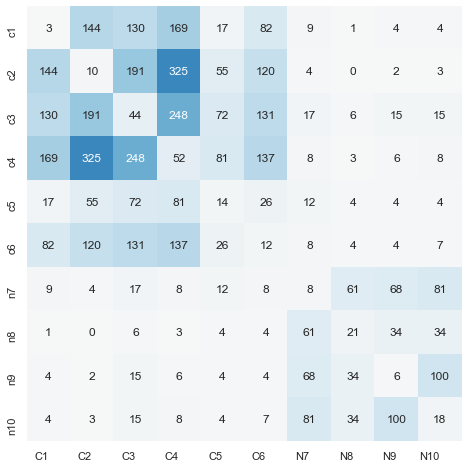

In [336]:
mask = np.zeros_like(prior)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 8))
    ax = sns.heatmap(prior, annot=True, center=0, square=True, vmax=500, vmin=0, cmap="RdBu",fmt='d',cbar=False)
    label_x = ax.get_xticklabels()
    plt.setp(label_x, horizontalalignment='right')
    plt.show()